## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_table = pd.merge(study_results, mouse_metadata, on="Mouse ID")
merge_table

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Checking the number of mice.
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_data = merge_table.loc[merge_table.duplicated(subset = ["Mouse ID","Timepoint"]), "Mouse ID"].unique()
grouped_data


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemouse = merge_table.loc[merge_table["Mouse ID"] == "g989"]
duplicatemouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
i = merge_table[(merge_table['Mouse ID'] == 'g989')].index


clean_df = merge_table.drop(i)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 

#and SEM of the tumor volume for each regimen

drug_regimen = clean_df.groupby("Drug Regimen")

# nba_df.groupby('POS')['player_weight'].mean()

mean = drug_regimen["Tumor Volume (mm3)"].mean()

median = drug_regimen["Tumor Volume (mm3)"].median()

variance = drug_regimen["Tumor Volume (mm3)"].var()

std = drug_regimen["Tumor Volume (mm3)"].std()

sem = drug_regimen["Tumor Volume (mm3)"].sem()

# put all variable into a dataframe

sum_stats = pd.DataFrame({'Mean': mean, 
                          'Median': median, 
                          'Variance': variance, 
                          'STD': std, 
                          'SEM': sem})

# This method is the most straighforward, creating multiple series and putting them all together at the end.
sum_stats


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [1]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

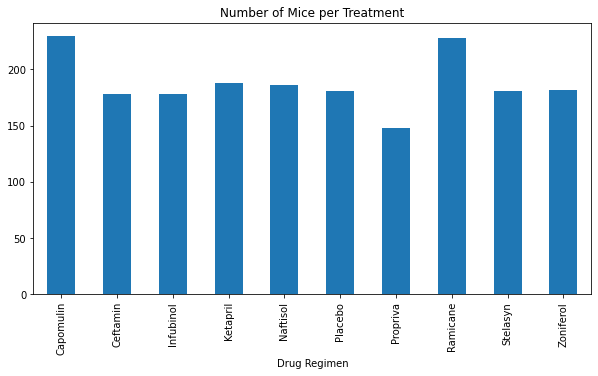

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_per_treatment = clean_df.groupby('Drug Regimen').count()['Mouse ID']


# Set title
plt.title('Number of Mice per Treatment')

# Plot bar
mouse_per_treatment.plot(kind='bar', figsize = (10,5))



# Show figure
plt.show()
plt.tight_layout()


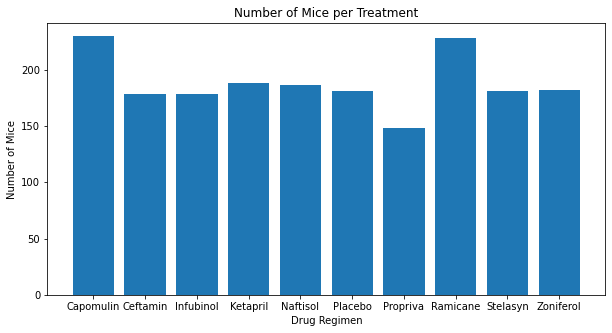

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set figure and size
plt.figure(figsize=(10,5))


# Set title
plt.title('Number of Mice per Treatment')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

# Plot bar
plt.bar(mouse_per_treatment.index, mouse_per_treatment.values)



# Show figure
plt.show()
plt.tight_layout()


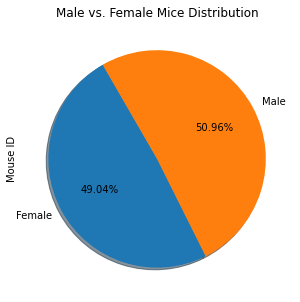

<Figure size 432x288 with 0 Axes>

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(10,5))
mice_sex = clean_df.groupby('Sex').count()['Mouse ID']


mice_sex.plot(kind='pie', autopct='%1.2f%%',shadow=True, startangle=120, title = "Male vs. Female Mice Distribution")

plt.show()
plt.tight_layout()

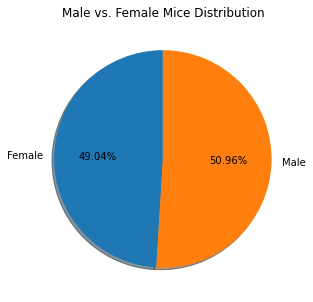

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(10,5))
plt.pie(mice_sex, autopct='%1.2f%%', labels=mice_sex.index, shadow=True, startangle=90)
plt.title('Male vs. Female Mice Distribution')
plt.show()


## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_ = clean_df.groupby(['Mouse ID']).max()
max_ = max_.reset_index()
treatments = max_[['Mouse ID', 'Timepoint']].merge(clean_df, on = ['Mouse ID', 'Timepoint'], how = 'left')

capomulin = treatments.loc[treatments["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
ramicane = treatments.loc[treatments["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
infubinol = treatments.loc[treatments["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
ceftamin = treatments.loc[treatments["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]

In [30]:
# Put treatments into a list for for loop (and later for plot labels)
# use class example for this part. ie Instrutor

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
t_stats = treatments.describe()['Tumor Volume (mm3)']
i_stats = infubinol.describe()
cef_stats = ceftamin.describe()
r_stats = ramicane.describe()
cap_stats = capomulin.describe()
    
tumor_vol_data = [t_stats, i_stats, cef_stats, r_stats, cap_stats]
regimens = ['ALL', 'INFUBINOL', 'CEFTAMIN', 'RAMICANE', 'CAPOMILIN']
for stat, regimen in zip(tumor_vol_data, regimens):

    upper_quart = stat[6]
    lower_quart = stat[4]
    iqr = upper_quart - lower_quart
    upper_bound = upper_quart + iqr*1.5
    lower_bound = lower_quart - iqr*1.5

    print('SUMMARY STATISTICS OF MICE AMONG {} DRUG REGIMENS\n'
          .format(regimen))
    print('There are no outliers among the upper bound: {}'.format(upper_bound > stat[7]))
    print('There are no outliers among the lower bound: {}'.format(lower_bound < stat[3]))
    print('\n')
    print('Upper Quartile = {:.2f}\n Lower Quartile = {:.2f}\n IQR = {:.2f}\n Upper Bound = {:.2f}\n Lower Bound = {:.2f}\n'.
          format(upper_quart, lower_quart, iqr, upper_bound, lower_bound))
    print('\n-------------------------------------------\n')
    

SUMMARY STATISTICS OF MICE AMONG ALL DRUG REGIMENS

There are no outliers among the upper bound: True
There are no outliers among the lower bound: True


Upper Quartile = 65.05
 Lower Quartile = 45.88
 IQR = 19.18
 Upper Bound = 93.82
 Lower Bound = 17.11


-------------------------------------------

SUMMARY STATISTICS OF MICE AMONG INFUBINOL DRUG REGIMENS

There are no outliers among the upper bound: True
There are no outliers among the lower bound: False


Upper Quartile = 65.53
 Lower Quartile = 54.05
 IQR = 11.48
 Upper Bound = 82.74
 Lower Bound = 36.83


-------------------------------------------

SUMMARY STATISTICS OF MICE AMONG CEFTAMIN DRUG REGIMENS

There are no outliers among the upper bound: True
There are no outliers among the lower bound: True


Upper Quartile = 64.30
 Lower Quartile = 48.72
 IQR = 15.58
 Upper Bound = 87.67
 Lower Bound = 25.36


-------------------------------------------

SUMMARY STATISTICS OF MICE AMONG RAMICANE DRUG REGIMENS

There are no outliers 

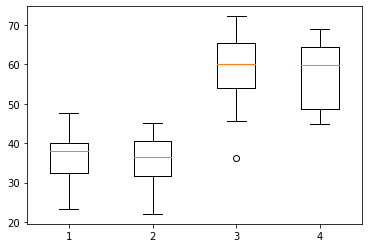

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
var = [capomulin, ramicane, infubinol, ceftamin]
plt.boxplot(var)
plt.show()

## Line and Scatter Plots

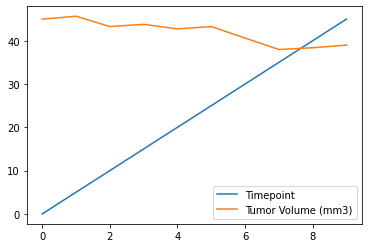

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_treatment = clean_df[clean_df['Mouse ID'].isin(['b128'])]
mouse_treated = mouse_treatment[
    ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']
                               ].reset_index().drop('index', axis=1)
mouse_treated.plot.line()
plt.show()

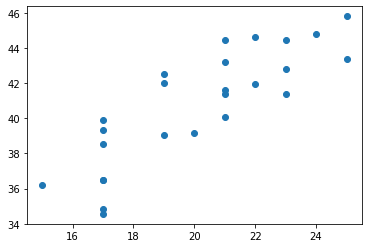

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mean = clean_df[clean_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()
plt.scatter(cap_mean['Weight (g)'], cap_mean['Tumor Volume (mm3)'])

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 

#Make sure your using a line regression graph and not just a line graph. Google "line regression graph"

# for mouse weight and average tumor volume for the Capomulin regimen
X = clean_df['Weight (g)']
y = clean_df['Tumor Volume (mm3)']
